# Feature Engineering

1. Missing Data Imputation
2. Encoding
3. Scaling
4. Outlier
5. Cardinality

review Model Evaluation

dan teknik menggunakan GridSearchCV

### Terminologi
sebelum membahas teknik mengisi missing data, kita perlu beberapa terminologi:

Data terbagi dua kelompok: Numerical, Categorical. (bukan data types pandas)

Numerikal terbagi dua lagi: discrete, continuous

Katerogi juga terbagi dua: nominal, ordinal
```
berat badan --> numerikal, continuous

dadu --> numerikal, discrete

gender, warna --> categorical, nominal

kelulusan, status single --> categorical, ordinal
```




## Missing Data Imputation
teknik teknik mengisi data yang hilang.

untuk data tipe numerical, kita bisa mengisi "missing value" dengan:
- mean --> data normal
- median --> data skewed
- sebuah value pilihan
- sebuah value yang dipilih berdasarkan tipe distribusi data

untuk data tipe kategorikal, kita bisa isi "missing value" dengan:
- kategori terbanyak
- kategori baru

untuk data tipe campuran:
- hapus semua missing values
- menambahkan kategori baru
- ambil dari data yang ada secara random untuk digunakan isi missing value

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df_sales = pd.read_csv('https://raw.githubusercontent.com/stefkwan-h8/dataset/main/superstoresales.csv')

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df_sales['Postal Code'].value_counts()

Postal Code
10035.0    253
10024.0    225
10009.0    220
94122.0    195
10011.0    193
          ... 
32935.0      1
76248.0      1
32127.0      1
32503.0      1
72762.0      1
Name: count, Length: 626, dtype: int64

postal code termasuk tipe kategori, nominal

kita bisa isi dengan postal code khusus untuk customer yang tidak mengisi postal code.

In [ ]:
df_sales['Postal Code'].describe()

count     9789.000000
mean     55273.322403
std      32041.223413
min       1040.000000
25%      23223.000000
50%      58103.000000
75%      90008.000000
max      99301.000000
Name: Postal Code, dtype: float64

mungkin kita pilih postal code 1000 atau 100000 untuk menandakan customer2 yang tidak punya postal code

In [ ]:
df_sales2 = df_sales.copy()

# kita isi missing values nya
df_sales2['Postal Code'] = df_sales['Postal Code'].fillna(1000)

In [ ]:
df_sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Encoding

encoding mengubah data dari text kategorikal menjadi angka.

karena datanya berubah jadi angka, dia jadi punya urutan walaupun aslinya tidak memiliki urutan. misalnya, gender, negara awal, nama tim bola, ...

urutan ini bisa tidak sengaja dianggap penting oleh model machine learning yang kita buat.

untuk menghindari kesalahan membuat urutan padahal tidak ada urutan, kita gunakan *one hot encoding*

### one hot encoding
membuat satu kolom baru untuk setiap unique value.

misalnya ada kolom "negara" di dataframe kita, dan di dalamnya ada 125 negara berbeda. maka one hot encoding akan membuat 125 kolom baru. valuenya adalah 0 untuk bukan dan 1 untuk iya.

### label encoding
label encoding tidak membuat data menjadi sangat besar. satu kolom tetap berubah menjadi satu kolom. hanya dia memiliki kekurangan membuat urutan di sebuah kategorical column.

In [ ]:
# coba encoding
df_sales2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


misalnya untuk kolom Segment, dan State

In [ ]:
df_sales2['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

kolom Segment memiliki 3 unique value. Paling sering Consumer, kemudian Corporate, dan terakhir Home Office.

In [ ]:
# one hot encoding

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df_sales2[['Segment']])

print(ohe.categories_)

encoded_segment = ohe.transform(df_sales2[['Segment']]).toarray()

df_segment = pd.DataFrame(encoded_segment, columns=ohe.categories_[0])
df_segment.head()

[array(['Consumer', 'Corporate', 'Home Office'], dtype=object)]


,Consumer,Corporate,Home Office
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
df_sales3 = pd.concat([df_sales2, df_segment], axis=1)
df_sales3.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Consumer,Corporate,Home Office
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,1.0,0.0,0.0
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,1.0,0.0,0.0
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,0.0,1.0,0.0
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,1.0,0.0,0.0
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,1.0,0.0,0.0


In [ ]:
# label encoding

df_sales2['State'].value_counts()

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

In [ ]:
le = LabelEncoder()

le.fit(df_sales2['State'])
print(le.classes_)
key_state = le.classes_

df_sales3['State_en'] = le.transform(df_sales2['State'])
df_sales3.head()

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Consumer,Corporate,Home Office,State_en
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,1.0,0.0,0.0,15
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,1.0,0.0,0.0,15
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,0.0,1.0,0.0,3
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,1.0,0.0,0.0,8
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,1.0,0.0,0.0,8


In [ ]:
key_state[3]

'California'

## Feature Scaling

Normalization: mengubah skala data menjadi di antara dua pembatas angka. Misalkan 0 dan 1, atau -1 dan 1

Standardization: mengubah data satu set sekaligus menjadi punya rata-rata 0 dan variance/sd 1

In [ ]:
# misalnya kita ambil data kolom Sales
df_sales2['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

<Axes: >

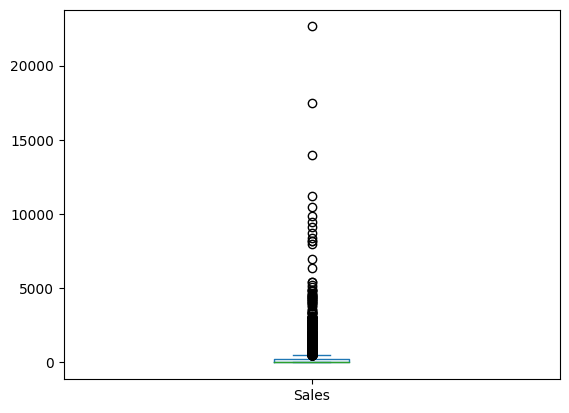

In [ ]:
df_sales2['Sales'].plot(kind="box")

In [ ]:
# menggunakan Normalization (min max scaler)

from sklearn.preprocessing import  MinMaxScaler

data = df_sales2[['Sales']]

mm_scaler = MinMaxScaler()
mm_scaler.fit(data)

print(mm_scaler.data_min_, mm_scaler.data_max_) # melihat range data kita setelah di scaling

df_sales3['Sales_normalised'] = mm_scaler.transform(data)
df_sales3[['Sales', 'Sales_normalised']].head()

[0.444] [22638.48]


,Sales,Sales_normalised
0,261.9600,0.011552
1,731.9400,0.032313
2,14.6200,0.000626
3,957.5775,0.042280
4,22.3680,0.000968


teknik min max scaler sensitif terdap outlier, bisa dilihat kalau nilai max nya di 22638.48 itu sangat jauh dari jumlah sales pada biasanya

In [ ]:
# menggunakan Standardization - pakai Standard Scaler

from sklearn.preprocessing import StandardScaler

data = df_sales2[['Sales']]

scaler = StandardScaler()
scaler.fit(data)

print(scaler.mean_)

df_sales3['Sales_standardized']=scaler.transform(data)
df_sales3[['Sales', 'Sales_normalised', 'Sales_standardized']].head()

[230.76905946]


,Sales,Sales_normalised,Sales_standardized
0,261.9600,0.011552,0.049776
1,731.9400,0.032313,0.799801
2,14.6200,0.000626,-0.344944
3,957.5775,0.042280,1.159887
4,22.3680,0.000968,-0.332580


standard scaler membuat rata2 awal kita menjadi 0, dan keseluruhan dataset menjadi memiliki standard deviation 1.

In [ ]:
df_sales3['Sales_standardized'].describe()

count    9.800000e+03
mean    -3.153940e-17
std      1.000051e+00
min     -3.675674e-01
25%     -3.407505e-01
50%     -2.813174e-01
75%     -3.217909e-02
max      3.575965e+01
Name: Sales_standardized, dtype: float64

## Outlier Handling

Data yang "luar biasa" kita namakan outlier/ pencilan

Data yang termasuk outlier bisa kita hitung dengan cara:
- menghitung limit atas  = Q3 + (IQR * 1.5)
- menghitung limit bawah = Q1 - (IQR * 1.5)

semua data yang berada di atas limit atas, atau di bawah limit bawah, adalah outlier.

Outlier bisa kita:
- hapus (Trimming)
- hapus lalu isi seperti isi missing value (Treat as Missing Value)
- ubah menjadi limit atas kalau dia outlier atas. limit bawah kalau dia outlier bawah (Censoring/ Capping)

In [ ]:
# misalkan kita gunakan data kolom Sales

data = df_sales2[['Sales']]
data.head()

,Sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680


In [ ]:
# kita deteksi outlier

summary_sales = data.describe()
summary_sales

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [ ]:
sales_q1 = summary_sales.loc['25%'][0]
sales_q3 = summary_sales.loc['75%'][0]

sales_iqr = sales_q3 - sales_q1

limit_atas = sales_q3 + 1.5*sales_iqr
limit_bawah = sales_q1 - 1.5*sales_iqr

print(limit_bawah, limit_atas)

-272.7875000000001 500.6405000000001


untuk angka yang tidak masuk akal kalau negative seperti sales, kita bisa set limit_bawah menjadi 0 apabila hasil hitung kita negatif.

In [ ]:
limit_bawah = 0

print(limit_bawah, limit_atas)

0 500.6405000000001


ini artinya untuk data Sales kita, tidak ada outlier yang berada di bawah

In [ ]:
# outlier sudah ketemu, kita bisa lihat data mana saja yang merupakan outlier

outlier_atas = df_sales2[df_sales['Sales'] > limit_atas]
outlier_atas['Sales']

1        731.9400
3        957.5775
7        907.1520
10      1706.1840
11       911.4240
          ...    
9759    1403.9200
9774    2177.5840
9781     673.5680
9787    1023.3320
9788     600.5580
Name: Sales, Length: 1145, dtype: float64

ada 1145 outlier yang value Sales diatas limit kita (500.64)

In [ ]:
df_sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Trimming - hapus

df_sales_trimmed = df_sales2.drop(index=outlier_atas.index)
df_sales_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8655 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8655 non-null   int64  
 1   Order ID       8655 non-null   object 
 2   Order Date     8655 non-null   object 
 3   Ship Date      8655 non-null   object 
 4   Ship Mode      8655 non-null   object 
 5   Customer ID    8655 non-null   object 
 6   Customer Name  8655 non-null   object 
 7   Segment        8655 non-null   object 
 8   Country        8655 non-null   object 
 9   City           8655 non-null   object 
 10  State          8655 non-null   object 
 11  Postal Code    8655 non-null   float64
 12  Region         8655 non-null   object 
 13  Product ID     8655 non-null   object 
 14  Category       8655 non-null   object 
 15  Sub-Category   8655 non-null   object 
 16  Product Name   8655 non-null   object 
 17  Sales          8655 non-null   float64
dtypes: float64(2)

dengan trimming, kita drop semua outlier, dan sisanya adalah 8655 data dari awalnya 9800

<Axes: >

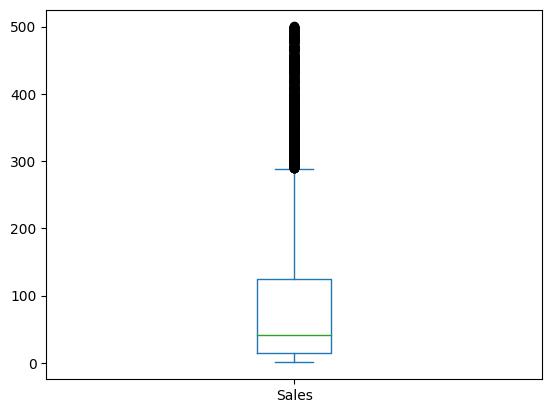

In [ ]:
df_sales_trimmed['Sales'].plot(kind="box")

In [ ]:
# Treat outlier seperti missing value

# misalnya semua outlier kita isi dengan value median
median_sales = df_sales2['Sales'].median()
median_sales

54.489999999999995

In [ ]:
# kita isi outlier dengan value median
df_sales_filled = df_sales2.copy()
df_sales_filled.loc[df_sales_filled['Sales'] > limit_atas, 'Sales'] = median_sales

df_sales_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

<Axes: >

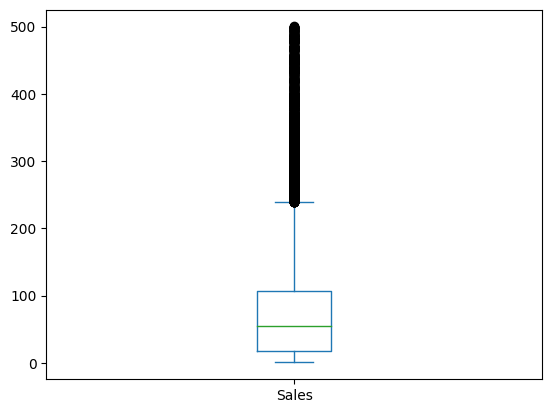

In [ ]:
df_sales_filled['Sales'].plot(kind="box")

semua outlier kita ubah datanya menjadi median value

In [ ]:
# Censoring / Capping - ubah semua data outlier atas jadi value limit atas. outlier bawah jadi limit bawah

df_sales_censoring = df_sales2.copy()
df_sales_censoring.loc[df_sales_censoring['Sales'] > limit_atas, 'Sales'] = limit_atas
df_sales_censoring.loc[df_sales_censoring['Sales'] < limit_bawah, 'Sales'] = limit_bawah

df_sales_censoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

<Axes: >

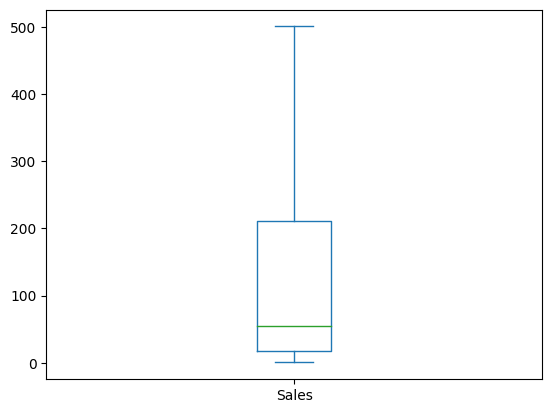

In [ ]:
df_sales_censoring['Sales'].plot(kind="box")

## Cardinality

Untuk Categorical data

lebih banyak unique value = lebih tinggi cardinality

misalnya gender = 2 unique value = cardinality rendah

misalnya tim basket nba = 30 unique values = cardinality tinggi

misalnya country = 195 unique values = cardinality sangat tinggi

---

Untuk data yang cardinality nya tinggi, One-Hot Encoding menjadi bermasalah karena banyaknya kolom yang ditambahkan.

algoritma Decision Tree, Random Forest, lemah terhadap One-Hot Encoding + cardinality tinggi.



In [ ]:
df_sales2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# cek cardinality

for col in df_sales2.columns:
  print(col, ":", df_sales2[col].nunique())

Row ID : 9800
Order ID : 4922
Order Date : 1230
Ship Date : 1326
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 529
State : 49
Postal Code : 627
Region : 4
Product ID : 1861
Category : 3
Sub-Category : 17
Product Name : 1849
Sales : 5757


ship mode, segment, region, category, dan sub-category memilki cardinality yang rendah

# Model Evaluation

### Regression
untuk model Regression biasanya kita gunakan R-square untuk mengetahui tingkat akurasi modelnya

garis regresi ke semua titik data, total jaraknya berapa, itu yang di representasikan R-square

perhatikan juga konsep over-fitting dan under-fitting.

Jika R-square tinggi, kita perlu cek R-square train dan test data. Jika R-square train data tinggi tapi R-square test data rendah, kemungkinan besar, model nya overfit.

Jika R-square rendah, kemungkinan modelnya underfit.

In [ ]:
df_sales2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Misalkan kita mau gunakan fitur ship mode, segment, region, category, dan sub-category, untuk memprediksi Sales menggunakan Linear Regression

In [ ]:
X = df_sales2[['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']]
X

,Ship Mode,Segment,Region,Category,Sub-Category
0,Second Class,Consumer,South,Furniture,Bookcases
1,Second Class,Consumer,South,Furniture,Chairs
2,Second Class,Corporate,West,Office Supplies,Labels
3,Standard Class,Consumer,South,Furniture,Tables
4,Standard Class,Consumer,South,Office Supplies,Storage
...,...,...,...,...,...
9795,Standard Class,Corporate,Central,Office Supplies,Binders
9796,Standard Class,Corporate,East,Office Supplies,Art
9797,Standard Class,Corporate,East,Technology,Phones
9798,Standard Class,Corporate,East,Technology,Phones


In [ ]:
y = df_sales2['Sales']
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: Sales, Length: 9800, dtype: float64

In [ ]:
# encoding fitur
X_en = X.copy()

for col in X.columns:
  data = X[col]

  le = LabelEncoder()
  le.fit(data)
  print(col, le.classes_)

  X_en[col] = le.transform(data)

X_en

Ship Mode ['First Class' 'Same Day' 'Second Class' 'Standard Class']
Segment ['Consumer' 'Corporate' 'Home Office']
Region ['Central' 'East' 'South' 'West']
Category ['Furniture' 'Office Supplies' 'Technology']
Sub-Category ['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables']


,Ship Mode,Segment,Region,Category,Sub-Category
0,2,0,2,0,4
1,2,0,2,0,5
2,2,1,3,1,10
3,3,0,2,0,16
4,3,0,2,1,14
...,...,...,...,...,...
9795,3,1,0,1,3
9796,3,1,1,1,2
9797,3,1,1,2,13
9798,3,1,1,2,13


In [ ]:
# train dan test data
X_train, X_test, y_train, y_test = train_test_split(X_en, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
X_train.head()

7840 1960
7840 1960


,Ship Mode,Segment,Region,Category,Sub-Category
3984,2,0,3,1,12
4824,3,0,1,0,5
1414,2,2,3,2,0
540,0,0,0,2,0
6522,2,0,0,1,12


In [ ]:
# buat model Linear Regression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# evaluasi

print(model_lr.score(X_train, y_train))
print(model_lr.score(X_test, y_test))

0.004614493509196738
0.003946700158315775


skor R-square yang sama sama rendah menunjukkan kalau model tidak bisa memprediksi dengan baik, kemungkinan underfit

### Classification
untuk model tipe classification kita menggunakan 2 teknik evaluasi:
- Confusion Matrix
- Classification Report

Confusion Matrix menunjukkan per kategori ada berapa banyak yang berhasil di prediksi model kita dengan benar, dan berapa banyak yang salah. Lalu kalau salah, jawaban apa yang diberikan model kita.

Classification Report menghitung ratio2 dari hasil confusion matrix. Ada berapa yang ditebak dengan benar? Ada berapa dari yang positif yang berhasil dikategorikan positif? Ada berapa rata-rata dari kedua hal ini? overall ada berapa % yang ditebak dengan benar?

In [ ]:
# cek demo code sesi 12 dan 13
# apakah confusion matrix dan classification report model nya lebih masuk akal sekarang?

# Tuning, Parameter Tuning
step ke-5 dari pembuatan model machine learning, Tuning, sejauh ini kita skip begitu saja

Sebenarnya selain mengerti setiap parameter sebuah model dan membuat tebakan berdasarkan informasi yang kita miliki, ada cara lain untuk tuning, yaitu, dengan brute force (coba coba sampai dapat yang terbaik)

dilakukan secara manual, akan makan banyak waktu dan belum tentu mendapat hasil yang baik. Jadi kita gunakan bantuan GridSearchCV

```python
from sklearn.model_selection import GridSearchCV
```

kita perlu beritahu GridSearchCV:
- algoritma model yang kita gunakan
- parameter yang mau dicoba
- cara hitung skor model
- jumlah cross-validation (data awal train test di beda bedain dan dicoba lagi hitung ulang semuanya)

Di contoh kali ini, kita coba buat model untuk prediksi "Segment" dari seorang customer punya "Category" "Sub-Category" dan "Sales"


In [ ]:
df_sales2.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [ ]:
# kita langsung ambil saja versi yang sudah encoded
X_en.head(3)

,Ship Mode,Segment,Region,Category,Sub-Category
0,2,0,2,0,4
1,2,0,2,0,5
2,2,1,3,1,10


In [ ]:
X = X_en[['Category', 'Sub-Category']]
X['Sales'] = df_sales2['Sales']

y = X_en['Segment']

<ipython-input-103-a51d9c3e472e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sales'] = df_sales2['Sales']


In [ ]:
X.head()

,Category,Sub-Category,Sales
0,0,4,261.9600
1,0,5,731.9400
2,1,10,14.6200
3,0,16,957.5775
4,1,14,22.3680


In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
9795    1
9796    1
9797    1
9798    1
9799    1
Name: Segment, Length: 9800, dtype: int64

In [ ]:
# split train test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(len(X_train), len(X_test))

7840 1960


In [ ]:
# optional, untuk membuat confusion matrix yang visual

def drawConfusionMatrix(cm, n, title="Confusion Matrix"):
    fig, ax = plt.subplots(figsize=(n, n))
    ax.imshow(cm)
    ax.grid(False)

    ax.xaxis.set(ticks=range(n))
    ax.set_xlabel("Predicted")
    ax.yaxis.set(ticks=range(n))
    ax.set_ylabel("Actual")
    ax.set_title(title)

    ax.set_ylim(n-0.5, -0.5)
    for i in range(n):
        for j in range(n):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()

In [ ]:
# latih model

# misalnya kita gunakan model SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

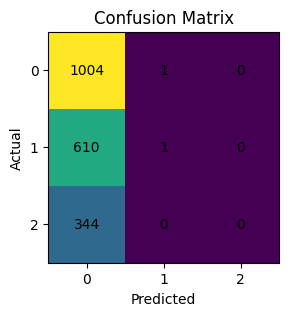

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      1005
           1       0.50      0.00      0.00       611
           2       0.00      0.00      0.00       344

    accuracy                           0.51      1960
   macro avg       0.34      0.33      0.23      1960
weighted avg       0.42      0.51      0.35      1960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# lihat hasil evaluasi model
y_pred = model_svc.predict(X_test)
drawConfusionMatrix(confusion_matrix(y_test, y_pred), 3)
print(classification_report(y_test, y_pred))

# minta GridSearchCV cobain ubah2 parameter model

untuk model SVC dari sklearn ada parameter2 berikut yang kita pilih dari https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html untuk kita coba ubah ubah


- C, default=1.0
- kernel {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
- gamma{'scale', 'auto'} or float, default='scale'

In [ ]:
# cobain sedikit
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma':['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.best_params_)

# lihat hasil prediksi model terbaik dari grid
grid_predictions = grid.predict(X_test)
drawConfusionMatrix(confusion_matrix(y_test, grid_predictions), 3)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# cobain lebih banyak
param_grid = {
    'C': [0.01, 0.1, 1, 2, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma':['scale', 'auto', 0.01, 0.1, 1, 2, 10, 100]
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.best_params_)

# lihat hasil prediksi model terbaik dari grid
grid_predictions = grid.predict(X_test)
drawConfusionMatrix(confusion_matrix(y_test, grid_predictions), 3)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


KeyboardInterrupt: 